In [105]:
import numpy as np
import pandas as pd
import datetime
from sklearn import linear_model
import matplotlib.pyplot as plt
import xgboost as xgb

df_HPI = pd.read_csv("data/HPI_PO_monthly_hist_cleaned.csv")
df_HPI["Month"] = pd.to_datetime(df_HPI["Month"])

HPI_By_Regions = df_HPI.iloc[:, 1:17]
df_HPI['Average HPI'] = pd.DataFrame(HPI_By_Regions.mean(axis=1))

#create differential column between months
df_HPI['HPI_diff'] = df_HPI["Average HPI"].diff()

df_HPI = df_HPI.fillna(0)

FEATURES = ['quarter','month','year','lag_1year','lag_2year','lag_3year']
TARGET = 'USA NSA'

df_HPI

,Month,East North Central NSA,East North Central SA,East South Central NSA,East South Central SA,Middle Atlantic NSA,Middle Atlantic SA,Mountain NSA,Mountain SA,New England NSA,...,South Atlantic NSA,South Atlantic SA,West North Central NSA,West North Central SA,West South Central NSA,West South Central SA,USA NSA,USA SA,Average HPI,HPI_diff
0,1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.000000,0.000000
1,1991-02-01,100.91,100.97,101.00,100.60,100.14,100.34,98.40,98.78,101.70,...,100.59,100.49,100.50,100.49,99.82,99.59,100.39,100.45,100.482500,0.482500
2,1991-03-01,101.31,100.92,100.85,100.43,100.07,99.83,100.23,100.64,101.48,...,101.02,100.65,100.43,100.14,100.62,100.48,100.68,100.48,100.584375,0.101875
3,1991-04-01,101.70,100.99,100.79,100.44,99.59,99.28,100.31,100.38,101.00,...,100.90,100.44,100.84,100.37,100.35,100.04,100.68,100.33,100.515625,-0.068750
4,1991-05-01,102.33,101.37,101.12,100.75,99.72,99.23,100.70,100.50,99.72,...,100.77,100.49,100.79,100.30,100.76,100.27,100.83,100.38,100.494375,-0.021250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2023-01-01,310.92,315.00,371.33,372.75,336.08,337.29,557.46,564.51,372.66,...,425.22,426.92,367.12,372.28,398.33,401.26,389.93,392.75,398.496250,0.708125
385,2023-02-01,315.55,317.34,379.00,378.81,339.46,341.22,571.10,572.41,376.27,...,428.24,427.38,374.22,376.19,406.79,407.51,395.47,396.04,403.353750,4.857500
386,2023-03-01,323.33,322.28,383.06,380.06,344.76,344.26,570.05,565.61,383.70,...,434.92,430.40,380.83,378.59,409.74,408.69,401.16,398.30,406.688750,3.335000
387,2023-04-01,329.64,325.13,382.70,379.66,354.39,350.02,580.64,570.23,396.40,...,439.57,432.95,386.23,380.61,416.46,410.99,407.39,401.23,411.663125,4.974375


,East North Central NSA,East North Central SA,East South Central NSA,East South Central SA,Middle Atlantic NSA,Middle Atlantic SA,Mountain NSA,Mountain SA,New England NSA,New England SA,...,West North Central SA,West South Central NSA,West South Central SA,USA NSA,USA SA,Average HPI,HPI_diff,quarter,month,year
Month,,,,,,,,,,,,,,,,,,,,,
1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.000000,0.000000,1,1,1991
1991-02-01,100.91,100.97,101.00,100.60,100.14,100.34,98.40,98.78,101.70,102.17,...,100.49,99.82,99.59,100.39,100.45,100.482500,0.482500,1,2,1991
1991-03-01,101.31,100.92,100.85,100.43,100.07,99.83,100.23,100.64,101.48,101.28,...,100.14,100.62,100.48,100.68,100.48,100.584375,0.101875,1,3,1991
1991-04-01,101.70,100.99,100.79,100.44,99.59,99.28,100.31,100.38,101.00,100.97,...,100.37,100.35,100.04,100.68,100.33,100.515625,-0.068750,2,4,1991
1991-05-01,102.33,101.37,101.12,100.75,99.72,99.23,100.70,100.50,99.72,99.75,...,100.30,100.76,100.27,100.83,100.38,100.494375,-0.021250,2,5,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,310.92,315.00,371.33,372.75,336.08,337.29,557.46,564.51,372.66,374.66,...,372.28,398.33,401.26,389.93,392.75,398.496250,0.708125,1,1,2023
2023-02-01,315.55,317.34,379.00,378.81,339.46,341.22,571.10,572.41,376.27,380.30,...,376.19,406.79,407.51,395.47,396.04,403.353750,4.857500,1,2,2023
2023-03-01,323.33,322.28,383.06,380.06,344.76,344.26,570.05,565.61,383.70,380.80,...,378.59,409.74,408.69,401.16,398.30,406.688750,3.335000,1,3,2023


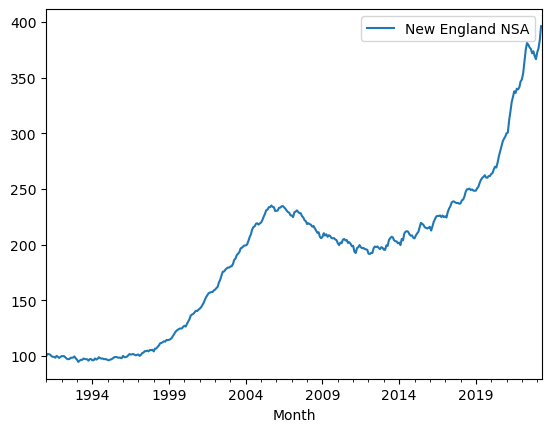

In [44]:
df_last_recession=df_HPI.loc[df_HPI["Month"].between('2007-04-01', '2013-01-01')]
df_last_recession=df_last_recession.reset_index()

new_england_HPI=df_HPI[['Month', 'New England NSA']].copy()
new_england_HPI["Month"]= pd.to_datetime(new_england_HPI["Month"])
new_england_HPI= new_england_HPI.set_index('Month')
new_england_HPI.plot.line()

df = df_HPI.copy()
df = df.set_index('Month')
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year

df

In [19]:
train_data = df_HPI.loc[df_HPI["Month"] <= '2019-01-01']
train_data = train_data.set_index('Month')
test_data = df_HPI.loc[df_HPI["Month"] > '2019-01-01']
test_data = test_data.set_index('Month')

plt.scatter(train_data.index.values, train_data['USA NSA'])
plt.scatter(test_data.index.values, test_data['USA NSA'])
plt.show()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


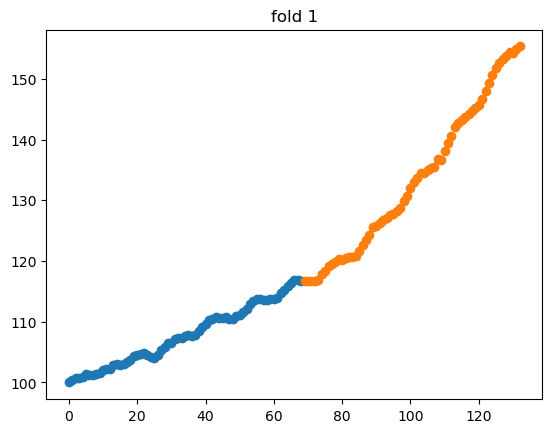

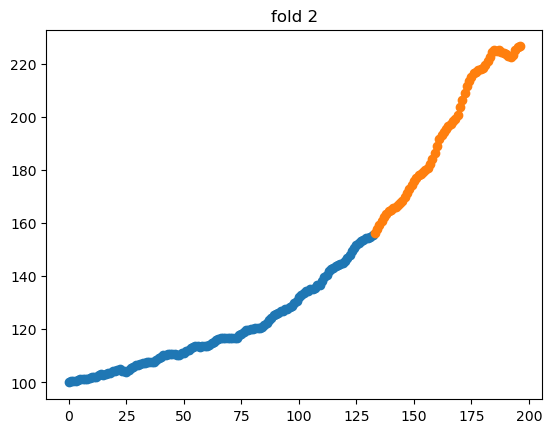

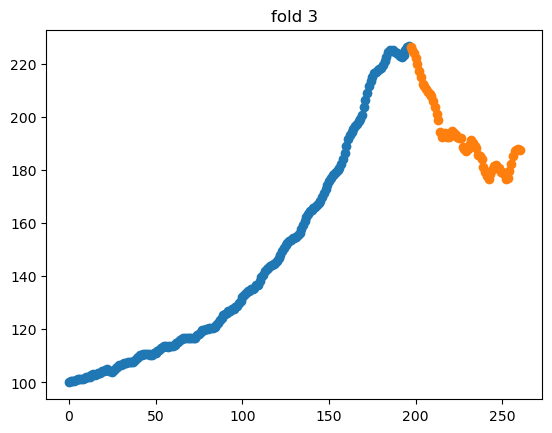

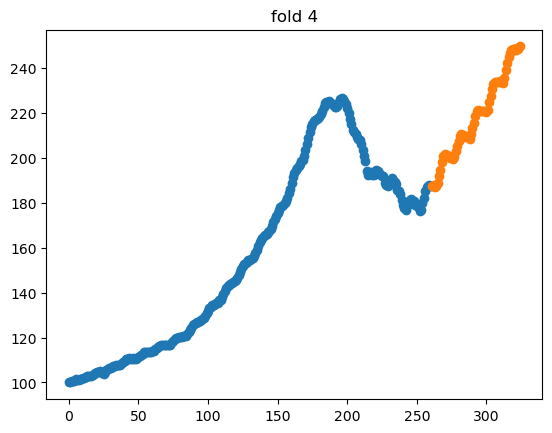

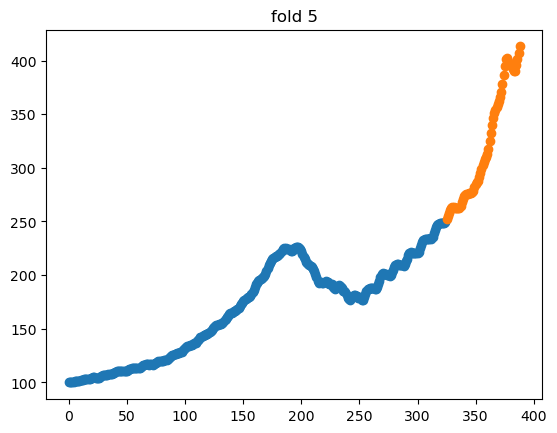

In [32]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)

print(tss)
fold = 0
for train_idx, val_idx in tss.split(df_HPI):
    train = df_HPI.iloc[train_idx]
    test = df_HPI.iloc[val_idx]
    fold += 1
    plt.title('fold ' + str(fold))
    plt.scatter(train.index.values, train['USA NSA'])
    plt.scatter(test.index.values, test['USA NSA'])
    plt.show()

In [45]:
def add_lags(df):
    target_map = df["USA NSA"].to_dict()
    df['lag_1year'] = (df.index - pd.Timedelta(days=365)).map(target_map)
    df['lag_2year'] = (df.index - pd.Timedelta(days=730)).map(target_map)
    df['lag_3year'] = (df.index - pd.Timedelta(days=1095)).map(target_map)
    return df

In [46]:
add_lags(df)
df

,East North Central NSA,East North Central SA,East South Central NSA,East South Central SA,Middle Atlantic NSA,Middle Atlantic SA,Mountain NSA,Mountain SA,New England NSA,New England SA,...,USA NSA,USA SA,Average HPI,HPI_diff,quarter,month,year,lag_1year,lag_2year,lag_3year
Month,,,,,,,,,,,,,,,,,,,,,
1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.000000,0.000000,1,1,1991,NaN,NaN,NaN
1991-02-01,100.91,100.97,101.00,100.60,100.14,100.34,98.40,98.78,101.70,102.17,...,100.39,100.45,100.482500,0.482500,1,2,1991,NaN,NaN,NaN
1991-03-01,101.31,100.92,100.85,100.43,100.07,99.83,100.23,100.64,101.48,101.28,...,100.68,100.48,100.584375,0.101875,1,3,1991,NaN,NaN,NaN
1991-04-01,101.70,100.99,100.79,100.44,99.59,99.28,100.31,100.38,101.00,100.97,...,100.68,100.33,100.515625,-0.068750,2,4,1991,NaN,NaN,NaN
1991-05-01,102.33,101.37,101.12,100.75,99.72,99.23,100.70,100.50,99.72,99.75,...,100.83,100.38,100.494375,-0.021250,2,5,1991,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,310.92,315.00,371.33,372.75,336.08,337.29,557.46,564.51,372.66,374.66,...,389.93,392.75,398.496250,0.708125,1,1,2023,370.32,313.16,NaN
2023-02-01,315.55,317.34,379.00,378.81,339.46,341.22,571.10,572.41,376.27,380.30,...,395.47,396.04,403.353750,4.857500,1,2,2023,378.46,317.72,NaN
2023-03-01,323.33,322.28,383.06,380.06,344.76,344.26,570.05,565.61,383.70,380.80,...,401.16,398.30,406.688750,3.335000,1,3,2023,386.52,325.08,284.73


In [61]:
from sklearn.metrics import mean_squared_error
scores = []
preds = []

FEATURES = ['quarter','month','year','lag_1year','lag_2year','lag_3year']
TARGET = 'USA NSA'

tss = TimeSeriesSplit(n_splits=5)

for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    
    X_train = train[FEATURES]
    y_train = train[TARGET]
    
    X_test = test[FEATURES]
    y_test = test[TARGET]
    
    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=500, early_stopping_rounds=50, objective='reg:linear', max_depth=3, learning_rate=0.01)
    reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose=100)
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    scores.append(rmse)

[12:33:22] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:106.38615	validation_1-rmse:132.44543
[100]	validation_0-rmse:39.77658	validation_1-rmse:66.21373
[200]	validation_0-rmse:15.12129	validation_1-rmse:39.77041
[300]	validation_0-rmse:5.88629	validation_1-rmse:29.22090
[400]	validation_0-rmse:2.36043	validation_1-rmse:24.64199
[499]	validation_0-rmse:0.99134	validation_1-rmse:22.80252
MSE:  519.955116462015
RMSE:  22.802524344072413
[12:33:22] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.50274	validation_1-rmse:194.81624
[100]	validation_0-rmse:44.86073	validation_1-rmse:108.61408
[200]	validation_0-rmse:17.04675	validation_1-rmse:73.43129
[300]	validation_0-rmse:6.60959	validation_1-rmse:59.13801
[400

In [62]:
scores

[22.802524344072413,
 50.536171741843425,
 13.13373866752262,
 35.692999504534086,
 96.13017232356657]

In [64]:
X_all = df[FEATURES]
y_all = df[TARGET]

reg2 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=500, objective='reg:linear', max_depth=3, learning_rate=0.01)
reg2.fit(X_all, y_all, eval_set=[(X_all, y_all)],verbose=100)

[12:33:36] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:204.42781
[100]	validation_0-rmse:77.04423
[200]	validation_0-rmse:29.62440
[300]	validation_0-rmse:11.92471
[400]	validation_0-rmse:5.57202
[499]	validation_0-rmse:3.57216


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [66]:
future_dates = pd.date_range('2023-06-01','2025-02-01', freq='MS')
print(future_dates)
future_df = pd.DataFrame(index=future_dates)
future_df['isFuture'] = True

DatetimeIndex(['2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01',
               '2025-02-01'],
              dtype='datetime64[ns]', freq='MS')


In [99]:
#mark old entries with isFuture=false
df['isFuture'] = False
#connect new rows to old set
df_and_future = pd.concat([df, future_df])
#set feature columns for combined set
df_and_future['quarter'] = df_and_future.index.quarter
df_and_future['month'] = df_and_future.index.month
df_and_future['year'] = df_and_future.index.year
#add time lag values
def add_lags_ft(x):
    target_map = x["USA NSA"].to_dict()
    x['lag_1year'] = (x.index - pd.DateOffset(years=1)).map(target_map)
    x['lag_2year'] = (x.index - pd.DateOffset(years=2)).map(target_map)
    x['lag_3year'] = (x.index - pd.DateOffset(years=3)).map(target_map)
    return x

df_and_future = add_lags_ft(df_and_future)
#df_and_future = df_and_future.rename_axis('Month').reset_index()#.rename(columns={'index' : "Month"}, inplace=True) 

In [100]:
df_and_future

,East North Central NSA,East North Central SA,East South Central NSA,East South Central SA,Middle Atlantic NSA,Middle Atlantic SA,Mountain NSA,Mountain SA,New England NSA,New England SA,...,USA SA,Average HPI,HPI_diff,quarter,month,year,lag_1year,lag_2year,lag_3year,isFuture
1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.000000,0.000000,1,1,1991,NaN,NaN,NaN,False
1991-02-01,100.91,100.97,101.00,100.60,100.14,100.34,98.40,98.78,101.70,102.17,...,100.45,100.482500,0.482500,1,2,1991,NaN,NaN,NaN,False
1991-03-01,101.31,100.92,100.85,100.43,100.07,99.83,100.23,100.64,101.48,101.28,...,100.48,100.584375,0.101875,1,3,1991,NaN,NaN,NaN,False
1991-04-01,101.70,100.99,100.79,100.44,99.59,99.28,100.31,100.38,101.00,100.97,...,100.33,100.515625,-0.068750,2,4,1991,NaN,NaN,NaN,False
1991-05-01,102.33,101.37,101.12,100.75,99.72,99.23,100.70,100.50,99.72,99.75,...,100.38,100.494375,-0.021250,2,5,1991,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,10,2024,NaN,394.67,359.48,True
2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,11,2024,NaN,392.55,362.45,True
2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,12,2024,NaN,390.26,365.63,True
2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1,2025,NaN,389.93,370.32,True


In [106]:
future_w_features = df_and_future.query('isFuture').copy()

In [107]:
future_w_features['prediction']=reg2.predict(future_w_features[FEATURES])

<Axes: >

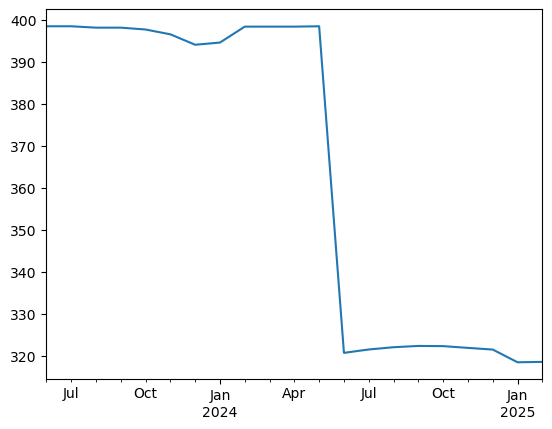

In [108]:
future_w_features['prediction'].plot.line()

In [116]:
monado_vision = future_w_features[['quarter','month','year','prediction']].copy()
monado_vision

from datetime import datetime
timestampStr = datetime.now().date().strftime("%d-%b-%Y")
monado_vision.to_csv('HPI_Predictions_To_Jan_2025_'+timestampStr+'.csv')

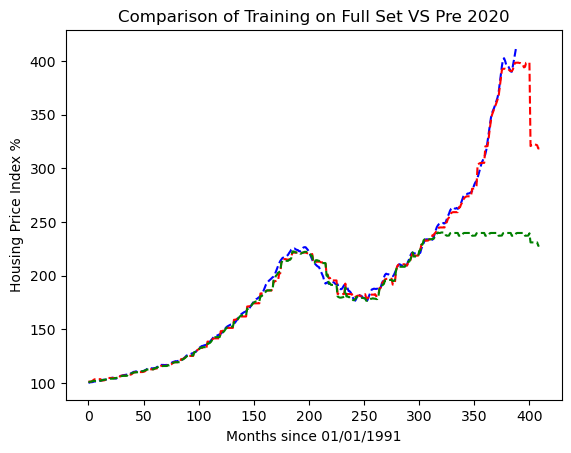

In [115]:
# Write code to predict values for test set using LinearREgression.predict() method.
y_predicted = reg2.predict(df_and_future[FEATURES])
y_predicted_pre_2020 = reg.predict(df_and_future[FEATURES])

# Generating x-axis points
x_points = np.arange(y_predicted.shape[0])

y_plot = df_and_future['USA NSA']

# Write code to visualize y_test and y_predicted in a single plot
# Hint 1: use matplotlib.pyplot.plot() method
# Hint 2: choose different colors for 2 curves
plt.title('Comparison of Training on Full Set VS Pre 2020')
plt.xlabel('Months since 01/01/1991')
plt.ylabel('Housing Price Index %')
plt.plot(x_points, y_plot, "b--") 
plt.plot(x_points, y_predicted, "r--")
plt.plot(x_points, y_predicted_pre_2020, "g--")

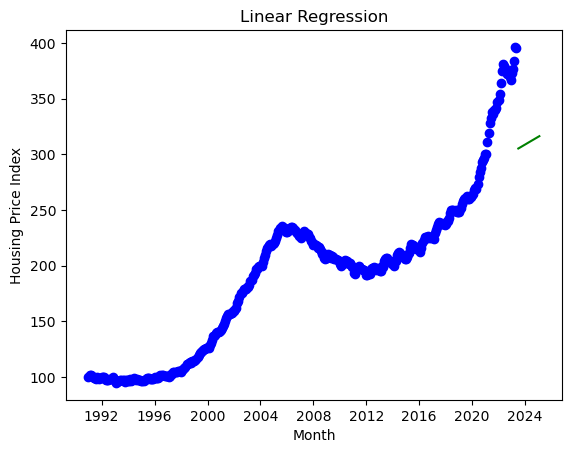

In [212]:
# arrange for creating a range of values
X_grid = df_and_future['Month'].values
 
# reshape for reshaping the data
# into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value
X_grid = X_grid.reshape((len(X_grid), 1))
 
# Scatter plot for original data
plt.scatter(X_grid, df_and_future["New England NSA"].values.reshape(-1,1), color='blue')
 
# plot predicted data
plt.plot(future_dates, future_w_features['prediction'].values.reshape(-1,1), color='green')
plt.title('Linear Regression')
plt.xlabel('Month')
plt.ylabel('Housing Price Index')
plt.show()